In [1]:
# Importing the Qiskit standard library and setting up an account
import math
import numpy as np
from math import sqrt
from numpy import pi 
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, transpile
from qiskit.quantum_info import Statevector, Operator
from qiskit.circuit.library import XGate
from qiskit.visualization import plot_histogram, plot_distribution
from qiskit_aer import Aer
from time import process_time

In [2]:
# qiskit 2.2.1
backend = Aer.get_backend('unitary_simulator')

In [ ]:
# Construction of the Uf matrix
nn=3
oracle=np.identity(2**nn)
oracle[2,2]=-1
print(oracle)
Uf=Operator(oracle)
Operator.is_unitary(Uf) 


[[ 1.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.  0.]
 [ 0.  0. -1.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  1.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  1.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  1.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  1.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  1.]]


True

In [4]:
# Creating quantum registers, 
# classical registers and a quantum circuit 
# representing the created Uf operator 
# Number of qubits and bits
n0=nn
# Quantum Register
q0 = QuantumRegister(n0)
# "Empty" quantum circuit
# for a gate named 'Uf'
CircuitUf = QuantumCircuit(q0,name='Uf')

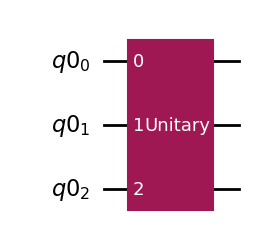

In [5]:
# Attaching the Uf operator to the circuit
# representing the Uf gate
CircuitUf.append(Uf,[q0[0],q0[1],q0[2]])
# Sketch of a quantum circuit
CircuitUf.draw(output='mpl')

In [6]:
# Transforming the Uf operator 
# into a uf quantum gate 
# denoted as Uf
uf=CircuitUf.to_gate()

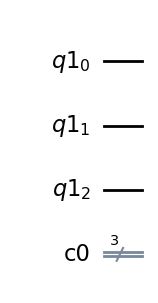

In [7]:
# Creating an "empty" warp
# quantum circuit of Grover's algorithm
# Number of qubits and bits
n=nn 
# Quantum Register
q = QuantumRegister(n) 
#  Classical Register
c = ClassicalRegister(n) 
# "Empty" quantum circuit -
# - the core of Grover's algorithm
Circuit = QuantumCircuit(q,c) 
# Sketch of a quantum circuit
Circuit.draw(output='mpl') 

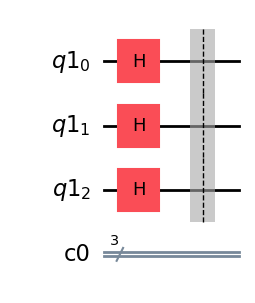

In [8]:
# |fi> State initiation 
Circuit.h(q[0])
Circuit.h(q[1])
Circuit.h(q[2])
Circuit.barrier()
# Sketch of a quantum circuit
Circuit.draw(output='mpl')

In [9]:
repeat=math.floor((pi/4)*sqrt(2**n))
print(repeat)

2


In [10]:
mccx=XGate().control(n0-1)

N= 1


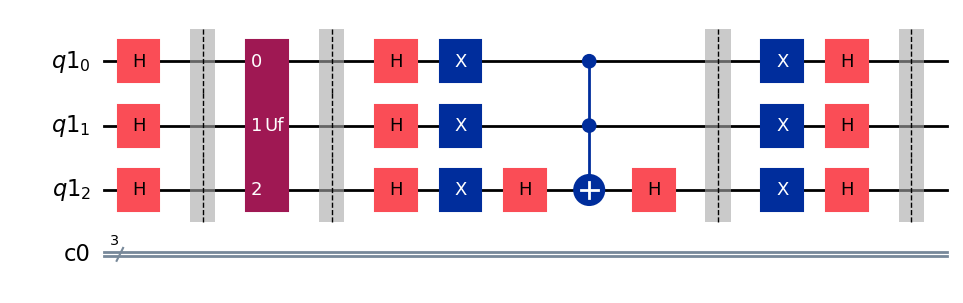

N= 2


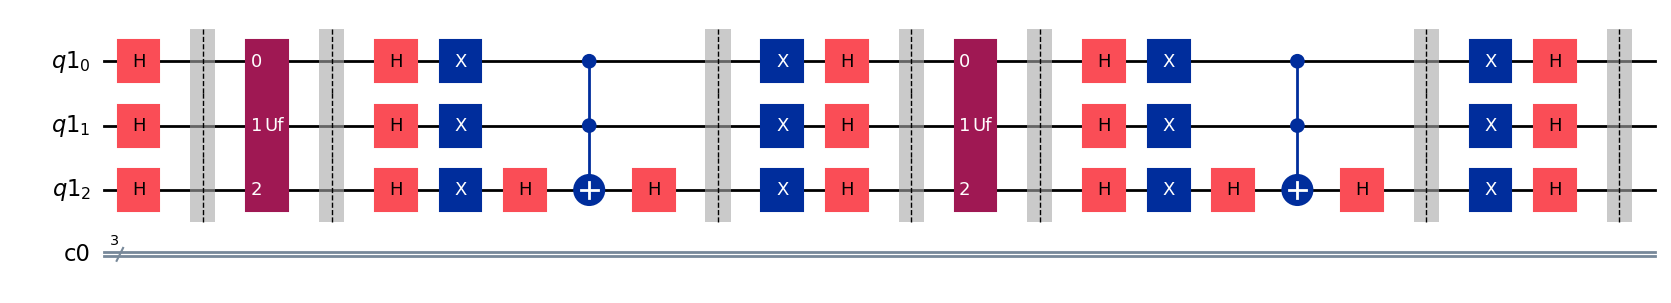

In [11]:
for ii in range(repeat):
    Circuit.append(uf,[0,1,2])
    Circuit.barrier() 
    # Beginning of the implementation of the W diffusion operator
    Circuit.h(q[0])
    Circuit.h(q[1])
    Circuit.h(q[2])
    Circuit.x(q[0])
    Circuit.x(q[1])
    Circuit.x(q[2])
    Circuit.h(q[2])
    Circuit.append(mccx, [q[0],q[1],q[2]])
    Circuit.h(q[2])
    Circuit.barrier()
    Circuit.x(q[0])
    Circuit.x(q[1])
    Circuit.x(q[2])
    Circuit.h(q[0])
    Circuit.h(q[1])
    Circuit.h(q[2]) 
    # The end of the implementation of the W diffusion operator
    Circuit.barrier()
    print("N=",ii+1)
    # print(Circuit)
    display(Circuit.draw(output='mpl'))

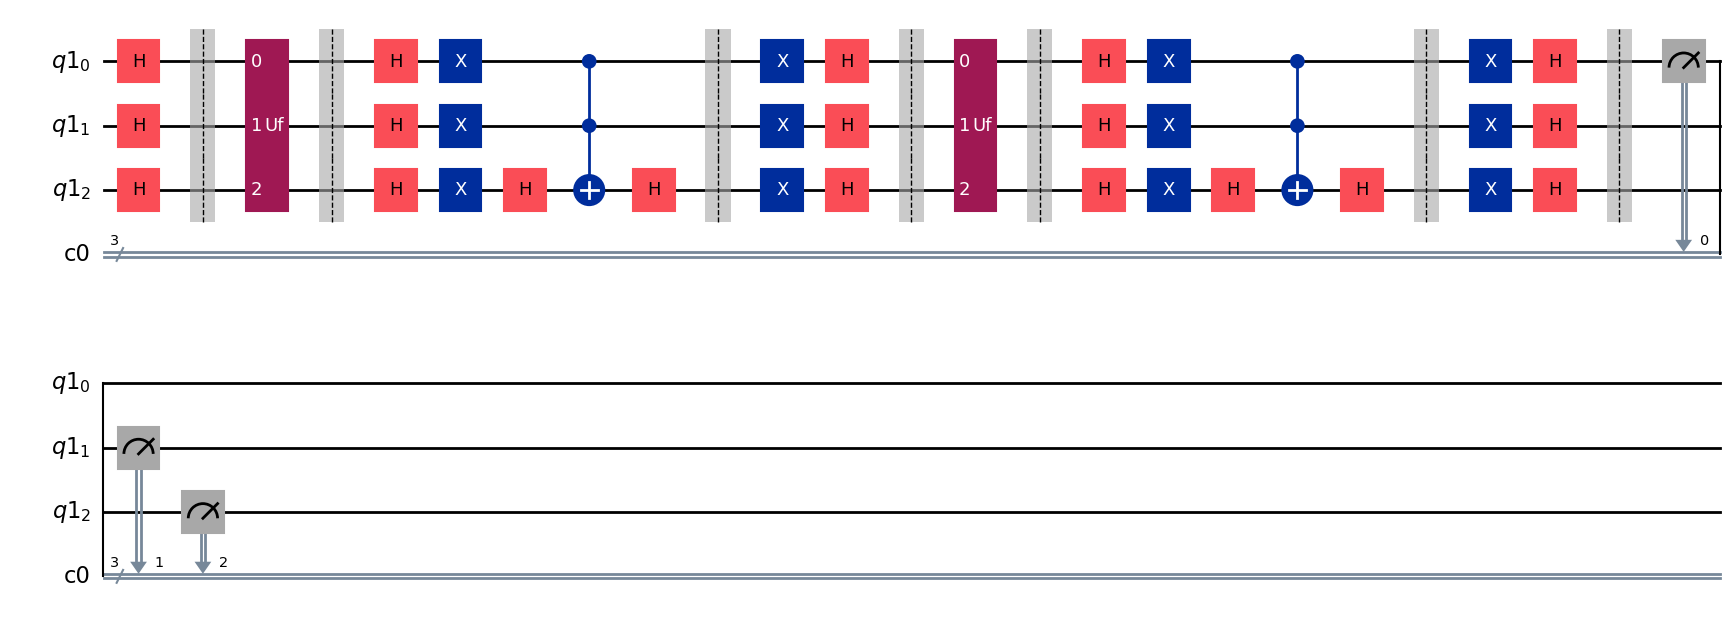

In [12]:
# Adding measurement operations to the quantum circuit
Circuit.measure(q[0],c[0])
Circuit.measure(q[1],c[1])
Circuit.measure(q[2],c[2])
Circuit.draw(output='mpl') # 

In [13]:
# Start the stopwatch / counter  
t1_start = process_time() 

In [14]:
# Select a quantum simulator (or processor).
backend_sim = Aer.get_backend('qasm_simulator')

# Transpile the circuit for the specific backend (needed in qiskit 1.x)
transpiled_circuit = transpile(Circuit, backend_sim)

# Perform quantum calculations
job_sim0 = backend_sim.run(transpiled_circuit, shots=1024)
sim_result0 = job_sim0.result()

# Numerical presentation of measurement results
print(sim_result0.get_counts())

{'010': 974, '111': 6, '011': 11, '110': 5, '100': 7, '001': 6, '101': 6, '000': 9}


In [15]:
# Stop the stopwatch / counter 
t1_stop = process_time() 
print("Elapsed time:", t1_stop, t1_start)  
print("Elapsed time during the whole program in seconds:", t1_stop-t1_start)  

Elapsed time: 3.953125 3.171875
Elapsed time during the whole program in seconds: 0.78125


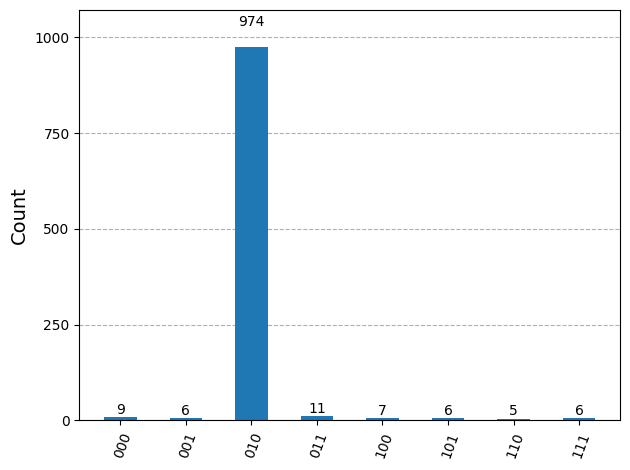

In [16]:
# Graphical presentation of X measurement results
plot_histogram(sim_result0.get_counts(Circuit))

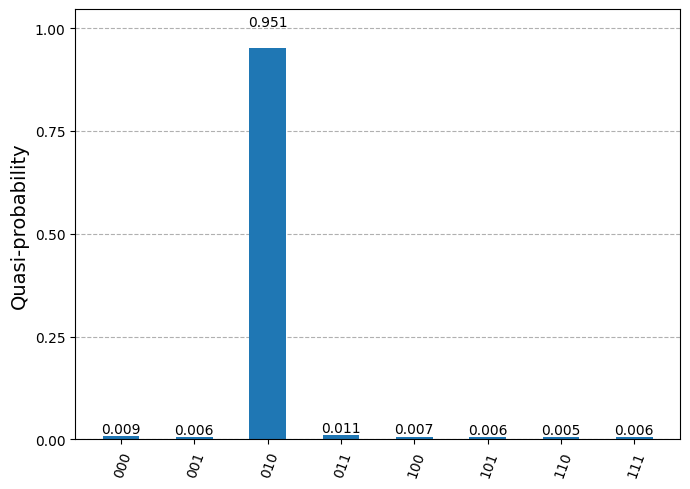

In [17]:
# Graphical presentation of X measurement results
plot_distribution(sim_result0.get_counts(Circuit))